In [ ]:
import pandas as pd
import main
import pandas as pd
import re
import time
from functools import wraps
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd


df_02 = pd.DataFrame(main.read_data_file('forecast_files/ETA40_p011221a021221.dat'))
df_03 = pd.DataFrame(main.read_data_file('forecast_files/ETA40_p011221a031221.dat'))
df_04 = pd.DataFrame(main.read_data_file('forecast_files/ETA40_p011221a041221.dat'))
df_05 = pd.DataFrame(main.read_data_file('forecast_files/ETA40_p011221a051221.dat'))
df_06 = pd.DataFrame(main.read_data_file('forecast_files/ETA40_p011221a061221.dat'))
df_07 = pd.DataFrame(main.read_data_file('forecast_files/ETA40_p011221a071221.dat'))
df_08 = pd.DataFrame(main.read_data_file('forecast_files/ETA40_p011221a081221.dat'))
df_09 = pd.DataFrame(main.read_data_file('forecast_files/ETA40_p011221a091221.dat'))
df_10 = pd.DataFrame(main.read_data_file('forecast_files/ETA40_p011221a101221.dat'))
df_11 = pd.DataFrame(main.read_data_file('forecast_files/ETA40_p011221a111221.dat'))



# Lista de DataFrames
dfs = [df_02, df_03, df_04, df_05, df_06, df_07, df_08, df_09, df_10, df_11]

# Mesclando DataFrames usando merge encadeado
merged_df = pd.merge(df_02, df_02, on=['lat', 'long'], how='inner')

merged_df['data_value'] = merged_df['data_value_x'] + merged_df['data_value_y']
del merged_df['data_value_x']
del merged_df['data_value_y']

for df in dfs[2:]:
    merged_df = pd.merge(merged_df, df, on=['lat', 'long'], how='inner')
    merged_df['data_value'] = merged_df['data_value_x'] + merged_df['data_value_y']
    del merged_df['data_value_x']
    del merged_df['data_value_y']


for x, y in merged_df.iterrows():

    if y['long'] < -50 or y['long'] > -40:
        merged_df.drop(x, inplace=True)
    elif y['lat'] < -23 or y['lat'] > -20:
        merged_df.drop(x, inplace=True)
        

merged_df

# plt.figure(figsize=(5, 6))
# contour_plot = plt.tricontourf(df['long'], df['lat'], df['data_value'], cmap='YlGnBu')
# plt.colorbar(contour_plot, label='Precipitação Acumulada (mm)')
# plt.title('Previsão de Precipitação Acumulada em 01/12/2021')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')

Text(0.5, 1.0, 'Mapa de Coordenadas')

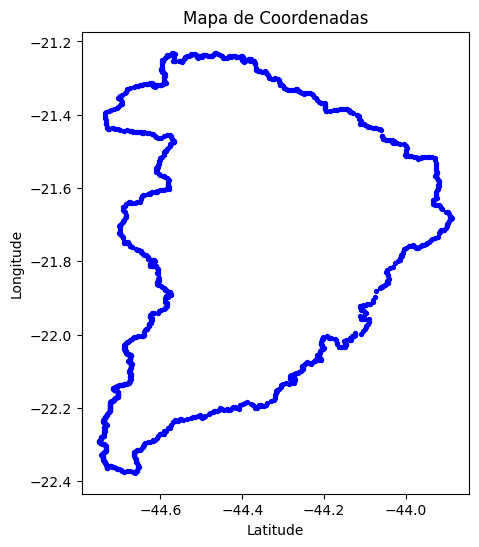

In [76]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
df_contour = main.read_contour_file('/Users/jeanlucevinson/Documents/Projetos/btg/bmg-challange/PSATCMG_CAMARGOS.bln')

# Extrai as latitudes e longitudes das coordenadas

# Cria um gráfico de dispersão com as coordenadas
plt.figure(figsize=(5, 6))  # Define o tamanho do gráfico (opcional)
teste = plt.scatter(df_contour['lat'], df_contour['long'], color='blue', marker='o', s=8)  # Cria o gráfico de dispersão
plt.xlabel('Latitude')  # Adiciona rótulo ao eixo x
plt.ylabel('Longitude')   # Adiciona rótulo ao eixo y
plt.title('Mapa de Coordenadas')  # Adiciona um título ao gráfico


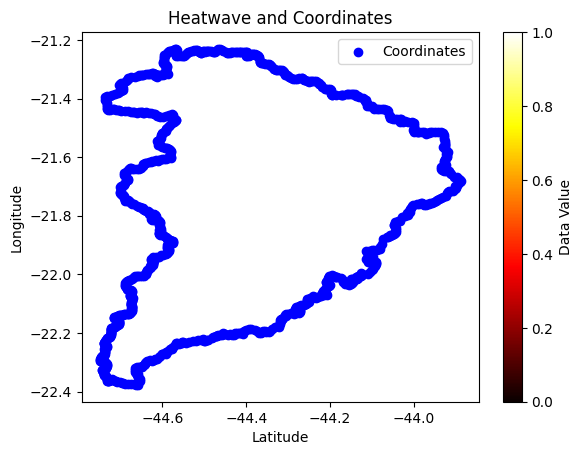

In [79]:
# Crie uma figura com subplots
fig, ax = plt.subplots()

# Plote o heatwave como um mapa de calor usando scatter plot com coloração baseada nos valores de data
heatmap = ax.scatter(merged_df['lat'], merged_df['long'], c=merged_df['data_value'], cmap='hot', s=1)

# Adicione uma barra de cores para indicar os valores de data
cbar = plt.colorbar(heatmap)
cbar.set_label('Data Value')

# Plote as coordenadas de latitude e longitude como pontos no mesmo gráfico
ax.scatter(df_contour['lat'], df_contour['long'], color='blue', label='Coordinates')

# Adicione rótulos aos eixos e um título ao gráfico
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_title('Heatwave and Coordinates')

# Adicione uma legenda para os pontos de coordenadas
ax.legend()

# Mostre o gráfico
plt.show()
